#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [1]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

In [2]:
# SP500 complete
start=datetime.datetime(1995, 1, 1)
end=datetime.datetime(2021, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end)


In [3]:
print(SP500.index)

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6547, freq=None)


In [4]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

In [5]:
print(sectors)

{'Information Technology', 'Health Care', 'Utilities', 'Materials', 'Consumer Staples', 'Communication Services', 'Financials', 'Industrials', 'Consumer Discretionary', 'Energy', 'Real Estate'}


In [6]:
def SectorPrices(sec,df, start, end):
    # takes the name of a sector and returns the aggregated data of all companies from start to end
    # which have full data for this time period
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
        
        # only add stocks o sector data which have full history
        if len(StockData.index) == len(SP500.index):
            Output = Output.add(StockData)
    
    return(Output)

In [127]:
def SectorNormReturns(sec,df, start, end, lag):
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from 
    # start to endhich have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
     
        
        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):
            
            
            
            # calculate returns
            StockData = (StockData.diff()/StockData) 
        
            # Shift the data to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            
            Output = Output.add(PlusOutput)
        
        
    return(Output)

In [85]:
SPPrice = SP500["Close"]

In [91]:
print(SPPrice)
print(SPPrice.diff())

Date
1995-01-03     459.109985
1995-01-04     460.709991
1995-01-05     460.339996
1995-01-06     460.679993
1995-01-09     460.829987
                 ...     
2020-12-24    3703.060059
2020-12-28    3735.360107
2020-12-29    3727.040039
2020-12-30    3732.040039
2020-12-31    3756.070068
Name: Close, Length: 6547, dtype: float64
Date
1995-01-03          NaN
1995-01-04     1.600006
1995-01-05    -0.369995
1995-01-06     0.339996
1995-01-09     0.149994
                ...    
2020-12-24    13.050049
2020-12-28    32.300049
2020-12-29    -8.320068
2020-12-30     5.000000
2020-12-31    24.030029
Name: Close, Length: 6547, dtype: float64


In [92]:
SPret = (SPPrice.diff()/SPPrice)
print(SPret)

Date
1995-01-03         NaN
1995-01-04    0.003473
1995-01-05   -0.000804
1995-01-06    0.000738
1995-01-09    0.000325
                ...   
2020-12-24    0.003524
2020-12-28    0.008647
2020-12-29   -0.002232
2020-12-30    0.001340
2020-12-31    0.006398
Name: Close, Length: 6547, dtype: float64


In [112]:
Shifted = pd.Series(SPret.iloc[0:(len(SPret)-1)])#, index = SPret.index[1:])
Shifted.index = SPret.index[1:]
print(Shifted)
print(Shifted.rolling(3).mean())

Date
1995-01-04         NaN
1995-01-05    0.003473
1995-01-06   -0.000804
1995-01-09    0.000738
1995-01-10    0.000325
                ...   
2020-12-24    0.000745
2020-12-28    0.003524
2020-12-29    0.008647
2020-12-30   -0.002232
2020-12-31    0.001340
Name: Close, Length: 6546, dtype: float64
Date
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09    0.001136
1995-01-10    0.000087
                ...   
2020-12-24   -0.001751
2020-12-28    0.000731
2020-12-29    0.004305
2020-12-30    0.003313
2020-12-31    0.002585
Name: Close, Length: 6546, dtype: float64


In [97]:
SPret.rolling(13).std()

Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.005303
2020-12-28    0.005768
2020-12-29    0.005242
2020-12-30    0.005192
2020-12-31    0.005309
Name: Close, Length: 6547, dtype: float64

In [113]:
((SPret-Shifted.rolling(13).mean())/Shifted.rolling(13).std()).head(50)

Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-23    0.314678
1995-01-24   -0.185360
1995-01-25    0.610363
1995-01-26    0.186807
1995-01-27    0.772308
1995-01-30   -1.296992
1995-01-31    0.660274
1995-02-01   -0.328927
1995-02-02    1.127875
1995-02-03    3.276504
1995-02-06    0.785458
1995-02-07   -0.515907
1995-02-08   -0.330038
1995-02-09   -1.212888
1995-02-10    0.075459
1995-02-13   -0.522924
1995-02-14   -0.104361
1995-02-15    0.442473
1995-02-16   -0.212238
1995-02-17   -2.584061
1995-02-21   -0.067665
1995-02-22    0.649081
1995-02-23    0.412567
1995-02-24    0.355756
1995-02-27   -3.287964
1995-02-28    1.674857
1995-03-01   -1.006575
1995-03-02   -0.417099
1995-03-03    0.005044
1995-0

In [114]:
(SPret-Shifted.rolling(13).mean())/Shifted.rolling(13).std()

Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.711822
2020-12-28    1.589526
2020-12-29   -0.503011
2020-12-30    0.043083
2020-12-31    0.978690
Name: Close, Length: 6547, dtype: float64

In [128]:
# Normalizes returns

NormRetDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    
    #Seclist.append(SectorPrices(s, start, end))
    NormRetDF[s] = SectorNormReturns(s, df,start, end, 13)
    
    

Information Technology
ADBE
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.298964
2020-12-28   -0.207535
2020-12-29    0.416330
2020-12-30   -1.018051
2020-12-31    0.188729
Name: Close, Length: 6547, dtype: float64
AMD
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.259667
2020-12-28   -0.012418
2020-12-29   -0.493375
2020-12-30    1.037085
2020-12-31   -0.401122
Name: Close, Length: 6547, dtype: float64
APH
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.688850
2020-12-28    0.859054
2020-12-29   -1.130496
2020-12-30    1.661478
2020-12-31    0.998737
Name: Close, Length: 6547, dtype: float64
ADI
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-0

PAYX
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.256154
2020-12-28   -0.400771
2020-12-29   -1.007644
2020-12-30   -0.788555
2020-12-31    0.839495
Name: Close, Length: 6547, dtype: float64
PTC
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -0.077316
2020-12-28   -1.638976
2020-12-29   -1.426988
2020-12-30    1.006361
2020-12-31   -0.340439
Name: Close, Length: 6547, dtype: float64
QCOM
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.744835
2020-12-28   -0.089650
2020-12-29    0.446747
2020-12-30    0.569504
2020-12-31    0.769114
Name: Close, Length: 6547, dtype: float64
SWKS
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01

DHR
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.707719
2020-12-28    0.825192
2020-12-29    0.086036
2020-12-30   -1.187477
2020-12-31    0.846636
Name: Close, Length: 6547, dtype: float64
XRAY
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.535161
2020-12-28    0.885505
2020-12-29   -1.359082
2020-12-30    0.631557
2020-12-31    1.493135
Name: Close, Length: 6547, dtype: float64
GILD
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -0.092358
2020-12-28    0.104385
2020-12-29    0.442787
2020-12-30    0.144782
2020-12-31    3.784759
Name: Close, Length: 6547, dtype: float64
HOLX
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01

AEP
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.956878
2020-12-28    0.049884
2020-12-29    0.074937
2020-12-30    0.532325
2020-12-31    1.907265
Name: Close, Length: 6547, dtype: float64
ATO
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.696671
2020-12-28    0.587972
2020-12-29    0.046123
2020-12-30    0.418445
2020-12-31    1.323881
Name: Close, Length: 6547, dtype: float64
CNP
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.428348
2020-12-28   -0.120914
2020-12-29   -0.063884
2020-12-30    0.494238
2020-12-31    0.656323
Name: Close, Length: 6547, dtype: float64
CMS
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06

ECL
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    1.402811
2020-12-28   -0.342190
2020-12-29    0.179135
2020-12-30    0.614191
2020-12-31    0.650505
Name: Close, Length: 6547, dtype: float64
FMC
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    1.020405
2020-12-28   -1.469828
2020-12-29    0.543784
2020-12-30    2.373964
2020-12-31    0.921805
Name: Close, Length: 6547, dtype: float64
IP
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.294297
2020-12-28   -0.843377
2020-12-29   -0.824957
2020-12-30    1.333802
2020-12-31    0.009116
Name: Close, Length: 6547, dtype: float64
IFF
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06 

K
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.455187
2020-12-28    1.146083
2020-12-29   -0.064404
2020-12-30   -1.675992
2020-12-31    1.418164
Name: Close, Length: 6547, dtype: float64
KMB
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.692930
2020-12-28    0.290558
2020-12-29    0.377239
2020-12-30   -0.874831
2020-12-31    1.898191
Name: Close, Length: 6547, dtype: float64
KR
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.349174
2020-12-28   -0.913572
2020-12-29    0.343478
2020-12-30    0.386841
2020-12-31    0.989224
Name: Close, Length: 6547, dtype: float64
MKC
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06   

AJG
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -0.100973
2020-12-28   -0.590765
2020-12-29   -1.206135
2020-12-30   -0.078827
2020-12-31    1.110396
Name: Close, Length: 6547, dtype: float64
BAC
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -0.289713
2020-12-28    0.211463
2020-12-29   -0.425482
2020-12-30   -0.245798
2020-12-31    0.537157
Name: Close, Length: 6547, dtype: float64
- BRK.B: No data found, symbol may be delisted
BK
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.062210
2020-12-28    0.561863
2020-12-29   -0.075705
2020-12-30    0.326596
2020-12-31    1.178882
Name: Close, Length: 6547, dtype: float64
BRO
Date
1995-01-03         NaN
1995-01-04

RF
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.109988
2020-12-28    0.051248
2020-12-29   -0.798878
2020-12-30    0.708807
2020-12-31    0.667901
Name: Close, Length: 6547, dtype: float64
SPGI
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    2.246116
2020-12-28    1.159079
2020-12-29    1.736894
2020-12-30    1.035469
2020-12-31    2.012923
Name: Close, Length: 6547, dtype: float64
STT
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.462025
2020-12-28    0.532834
2020-12-29    0.086630
2020-12-30    0.576526
2020-12-31    0.904010
Name: Close, Length: 6547, dtype: float64
SIVB
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-0

FDX
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -0.021292
2020-12-28   -0.751594
2020-12-29    0.282879
2020-12-30    0.178092
2020-12-31    0.395904
Name: Close, Length: 6547, dtype: float64
GD
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.703194
2020-12-28    0.012467
2020-12-29   -0.404437
2020-12-30    0.642809
2020-12-31    0.396084
Name: Close, Length: 6547, dtype: float64
GE
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -1.011346
2020-12-28    0.037075
2020-12-29   -0.260281
2020-12-30    1.283098
2020-12-31    0.771031
Name: Close, Length: 6547, dtype: float64
GWW
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06  

BBY
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.261576
2020-12-28    0.006767
2020-12-29   -1.310665
2020-12-30    0.643206
2020-12-31   -1.144169
Name: Close, Length: 6547, dtype: float64
BWA
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -0.678189
2020-12-28    0.330859
2020-12-29   -0.726482
2020-12-30    0.796245
2020-12-31   -0.733251
Name: Close, Length: 6547, dtype: float64
CCL
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.140183
2020-12-28    1.553750
2020-12-29   -0.184295
2020-12-30    0.661911
2020-12-31   -0.112142
Name: Close, Length: 6547, dtype: float64
DHI
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06

CVX
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.140876
2020-12-28   -0.011237
2020-12-29    0.157382
2020-12-30    0.868058
2020-12-31   -0.278571
Name: Close, Length: 6547, dtype: float64
COP
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -0.345906
2020-12-28    0.082915
2020-12-29    0.034004
2020-12-30    1.612068
2020-12-31    0.388091
Name: Close, Length: 6547, dtype: float64
CTRA
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24   -0.758976
2020-12-28   -1.316828
2020-12-29   -1.044385
2020-12-30    1.138457
2020-12-31   -0.311671
Name: Close, Length: 6547, dtype: float64
EOG
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-0

VNO
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.079410
2020-12-28    1.657341
2020-12-29   -1.016182
2020-12-30    0.915078
2020-12-31    1.403921
Name: Close, Length: 6547, dtype: float64
WELL
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    1.095928
2020-12-28   -0.324533
2020-12-29    0.321397
2020-12-30    0.660717
2020-12-31    0.724032
Name: Close, Length: 6547, dtype: float64
WY
Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2020-12-24    0.019605
2020-12-28   -0.837795
2020-12-29   -1.195738
2020-12-30    0.399498
2020-12-31   -0.546355
Name: Close, Length: 6547, dtype: float64


In [129]:
print(NormRetDF)

            Information Technology  Health Care  Utilities  Materials  \
Date                                                                    
1995-01-03                     NaN          NaN        NaN        NaN   
1995-01-04                     NaN          NaN        NaN        NaN   
1995-01-05                     NaN          NaN        NaN        NaN   
1995-01-06                     NaN          NaN        NaN        NaN   
1995-01-09                     NaN          NaN        NaN        NaN   
...                            ...          ...        ...        ...   
2020-12-24               18.169978    10.524843  22.020046   9.536270   
2020-12-28                4.679095    -0.181334  17.558908  -7.754826   
2020-12-29              -23.941817     7.280841   3.675748  -2.512330   
2020-12-30               24.095710    -2.669494  12.605267  18.773881   
2020-12-31               24.487739    38.978762  35.191318   6.918409   

            Consumer Staples  Communication Servic

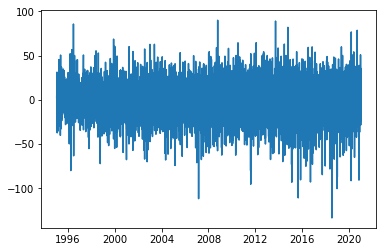

In [131]:
plt.plot(NormRetDF["Utilities"])

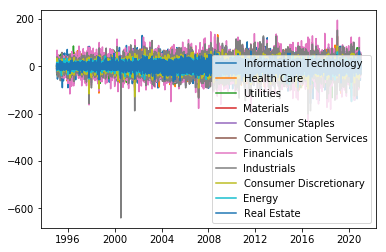

In [132]:
for i in NormRetDF.columns:
    plt.plot(NormRetDF[i], label=i)
    
plt.legend()
plt.show()

In [135]:
NormRetDF.idxmin()

Information Technology   2000-11-29
Health Care              1997-10-27
Utilities                2018-07-09
Materials                2001-09-17
Consumer Staples         2007-02-27
Communication Services   2013-02-14
Financials               2016-06-24
Industrials              2000-07-13
Consumer Discretionary   2001-09-17
Energy                   2020-03-09
Real Estate              2015-08-24
dtype: datetime64[ns]

In [137]:
NormRetDF.loc["2000-11-29"]

Information Technology         -inf
Health Care               23.349066
Utilities                 15.139068
Materials                 10.692316
Consumer Staples          10.383887
Communication Services    -0.307223
Financials                57.292899
Industrials               23.588749
Consumer Discretionary    -0.865758
Energy                   -44.596589
Real Estate               11.160608
Name: 2000-11-29 00:00:00, dtype: float64

In [136]:
df[df["GICS Sector"] =="Information Technology"]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ADBE,Adobe,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AMD,Advanced Micro Devices,reports,Information Technology,Semiconductors,"Santa Clara, California",NaN,2488,1969
13,AKAM,Akamai Technologies,reports,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998
37,APH,Amphenol,reports,Information Technology,Electronic Components,"Wallingford, Connecticut",2008-09-30,820313,1932
...,...,...,...,...,...,...,...,...,...
475,V,Visa,reports,Information Technology,Data Processing & Outsourced Services,"San Francisco, California",2009-12-21,1403161,1958
489,WDC,Western Digital,reports,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2009-07-01,106040,1970
490,WU,Western Union,reports,Information Technology,Data Processing & Outsourced Services,"Englewood, Colorado",2006-09-29,1365135,1851
498,XLNX,Xilinx,reports,Information Technology,Semiconductors,"San Jose, California",1999-11-08,743988,1984


In [7]:
SectorPrices("Real Estate", df,start, end)

Date
1995-01-03      71.326281
1995-01-04      71.497543
1995-01-05      71.538368
1995-01-06      71.322930
1995-01-09      71.496335
                 ...     
2020-12-24    1307.739206
2020-12-28    1320.167474
2020-12-29    1303.770238
2020-12-30    1315.966461
2020-12-31    1329.620775
Name: Close, Length: 6547, dtype: float64

In [8]:
SP500["Close"]

Date
1995-01-03     459.109985
1995-01-04     460.709991
1995-01-05     460.339996
1995-01-06     460.679993
1995-01-09     460.829987
                 ...     
2020-12-24    3703.060059
2020-12-28    3735.360107
2020-12-29    3727.040039
2020-12-30    3732.040039
2020-12-31    3756.070068
Name: Close, Length: 6547, dtype: float64

In [9]:
SP500["Close"].diff()

Date
1995-01-03          NaN
1995-01-04     1.600006
1995-01-05    -0.369995
1995-01-06     0.339996
1995-01-09     0.149994
                ...    
2020-12-24    13.050049
2020-12-28    32.300049
2020-12-29    -8.320068
2020-12-30     5.000000
2020-12-31    24.030029
Name: Close, Length: 6547, dtype: float64

In [10]:
def SectorPrices(sec, df,start, end):
    # takes the name of a sector and returns the aggregated data of all companies from start to end
    # which have full data for this time period
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
        
        # only add stocks o sector data which have full history
        if len(StockData.index) == len(SP500.index):
            Output = Output.add(StockData)
    
    return(Output)

In [11]:
energy = SectorPrices("Energy", df,start, end)

In [12]:
print(energy)

Date
1995-01-03     82.377878
1995-01-04     82.752757
1995-01-05     82.424196
1995-01-06     81.928094
1995-01-09     81.672667
                 ...    
2020-12-24    498.033412
2020-12-28    493.322151
2020-12-29    490.629490
2020-12-30    500.503043
2020-12-31    495.638881
Name: Close, Length: 6547, dtype: float64


In [76]:
def LocalRenorm(Data,lag):
    # gets a pandas Series of log-returns (without NaNs)
    # returns local renormalisation of the log-returns with the previous "lag" days
    rho = np.empty(len(Data)-lag)
    for i in range(len(Data)-lag):
        rho[i] = (Data.iloc[i+lag] - np.mean(Data.iloc[i:(i+lag)])) / np.std(Data.iloc[i:(i+lag)])
        
    return(pd.Series(rho, index = Data.index[lag:]))

In [77]:
LocalRenorm(SPReturns,13)

Date
1995-01-23    0.326920
1995-01-24   -0.193388
1995-01-25    0.636261
1995-01-26    0.195509
1995-01-27    0.811719
                ...   
2020-12-24    0.740648
2020-12-28    1.672260
2020-12-29   -0.530278
2020-12-30    0.044467
2020-12-31    1.034693
Length: 6533, dtype: float64

In [63]:
SPReturns = SP500["Close"].diff()
SPReturns = SPReturns.iloc[1:]
print(SPReturns)
l = 13
rho = np.empty(len(SPReturns)-l)
for i in range(len(SPReturns)-l):
    meanr = np.mean(SPReturns.iloc[i:(i+l)])
    meansigma = np.std(SPReturns.iloc[i:(i+l)])
    rho[i] = (SPReturns.iloc[i+l]-meanr)/meansigma
print(rho)    



Date
1995-01-04     1.600006
1995-01-05    -0.369995
1995-01-06     0.339996
1995-01-09     0.149994
1995-01-10     0.850006
                ...    
2020-12-24    13.050049
2020-12-28    32.300049
2020-12-29    -8.320068
2020-12-30     5.000000
2020-12-31    24.030029
Name: Close, Length: 6546, dtype: float64
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
1

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
1

In [68]:
SPReturns.index[l:]

DatetimeIndex(['1995-01-23', '1995-01-24', '1995-01-25', '1995-01-26',
               '1995-01-27', '1995-01-30', '1995-01-31', '1995-02-01',
               '1995-02-02', '1995-02-03',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6533, freq=None)

In [69]:
pd.Series(rho, 
          index = SPReturns.index[l:])

Date
1995-01-23    0.326920
1995-01-24   -0.193388
1995-01-25    0.636261
1995-01-26    0.195509
1995-01-27    0.811719
                ...   
2020-12-24    0.740648
2020-12-28    1.672260
2020-12-29   -0.530278
2020-12-30    0.044467
2020-12-31    1.034693
Length: 6533, dtype: float64

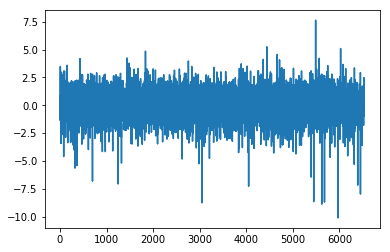

In [65]:
plt.plot(rho)
plt.show()

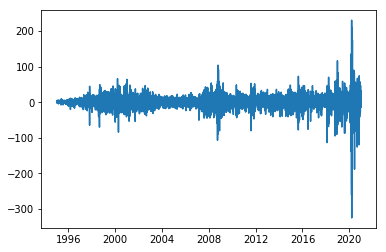

In [64]:
plt.plot(SPReturns)
plt.show()

In [58]:
SPReturns.iloc[0:10]

Date
1995-01-04    1.600006
1995-01-05   -0.369995
1995-01-06    0.339996
1995-01-09    0.149994
1995-01-10    0.850006
1995-01-11   -0.019989
1995-01-12   -0.019989
1995-01-13    4.329987
1995-01-16    3.410004
1995-01-17    0.669983
Name: Close, dtype: float64

In [60]:
SPReturns.iloc[9]

0.66998291015625

In [13]:
Seclist = list()


In [14]:
SectorsDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    
    #Seclist.append(SectorPrices(s, start, end))
    SectorsDF[s] = SectorPrices(s, df,start, end)
    

Information Technology
Health Care
- OGN: Data doesn't exist for startDate = 788914800, endDate = 1609455600
Utilities
Materials
Consumer Staples
- BF.B: No data found for this date range, symbol may be delisted
Communication Services
Financials
- BRK.B: No data found, symbol may be delisted
Industrials
Consumer Discretionary
Energy
Real Estate


Information Technology
Health Care
- OGN: Data doesn't exist for startDate = 788914800, endDate = 1609455600
Utilities
Materials
Consumer Staples
- BF.B: No data found for this date range, symbol may be delisted
Communication Services
Financials
- BRK.B: No data found, symbol may be delisted
Industrials
Consumer Discretionary
Energy
Real Estate


In [80]:
print(NormRetDF)

            Information Technology  Health Care  Utilities  Materials  \
Date                                                                    
1995-01-20               -2.252485    -0.684799   0.176562  -1.495576   
1995-01-23               -0.805380     0.568070   0.040380  -1.950668   
1995-01-24                0.354564     0.058135   0.179366  -1.371392   
1995-01-25               -1.759135    -1.542018   0.334618  -0.317905   
1995-01-26               -1.158744     0.318388   0.056161  -1.159269   
...                            ...          ...        ...        ...   
2020-12-24                0.923544     0.330671   1.231253   0.826377   
2020-12-28                0.052815    -0.146192   0.921088  -0.088769   
2020-12-29               -0.891770     0.187441   0.245894  -0.470800   
2020-12-30                1.012835    -0.350753   0.768942   1.374495   
2020-12-31                0.925566     1.562058   1.915129   0.509220   

            Consumer Staples  Communication Servic

In [83]:
print(SectorsDF.rolling(3).std())

            Information Technology  Health Care  Utilities  Materials  \
Date                                                                    
1995-01-03                     NaN          NaN        NaN        NaN   
1995-01-04                     NaN          NaN        NaN        NaN   
1995-01-05                0.392506     0.430512   0.368753   0.883464   
1995-01-06                1.429174     1.193345   0.235760   1.254491   
1995-01-09                4.441833     1.333411   0.233495   1.382701   
...                            ...          ...        ...        ...   
2020-12-24               26.426900    18.825702   5.421031   8.149445   
2020-12-28               27.268798    14.962337   9.020158   8.399360   
2020-12-29               21.965807    11.425043   4.446666   7.499242   
2020-12-30               23.287189    10.187889   4.344450  14.402565   
2020-12-31               41.249748    51.039195  15.974679  21.708620   

            Consumer Staples  Communication Servic

In [31]:
ReturnsDF = SectorsDF.diff().iloc[1:]

In [16]:
SectorsDF.index

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6547, freq=None)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

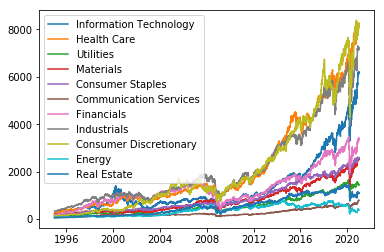

In [17]:
for i in SectorsDF.columns:
    plt.plot(SectorsDF.index,SectorsDF[i], label = i)
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

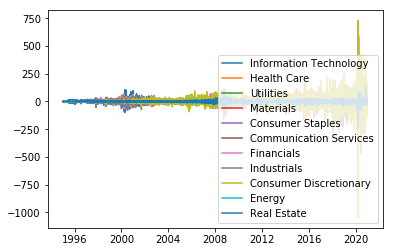

In [32]:
for i in ReturnsDF.columns:
    plt.plot(ReturnsDF.index,ReturnsDF[i], label = i)
plt.legend()
plt.show()

## Some Data Analysis

In [33]:
Corr = ReturnsDF.corr()

for i in Corr.columns:
    print(np.mean(Corr[i]),i)

Corr

0.6714951604286483 Information Technology
0.661983570210698 Health Care
0.5892267085702854 Utilities
0.7250385930223711 Materials
0.6602395104560005 Consumer Staples
0.6657449010251848 Communication Services
0.7062535644253749 Financials
0.7474085277058303 Industrials
0.6221447173001189 Consumer Discretionary
0.5403915283134174 Energy
0.6219066027286357 Real Estate


,Information Technology,Health Care,Utilities,Materials,Consumer Staples,Communication Services,Financials,Industrials,Consumer Discretionary,Energy,Real Estate
Information Technology,1.000000,0.769118,0.483898,0.708047,0.622765,0.748910,0.706093,0.773194,0.616174,0.453609,0.504637
Health Care,0.769118,1.000000,0.529522,0.690774,0.683781,0.674472,0.665233,0.733804,0.582685,0.451124,0.501306
Utilities,0.483898,0.529522,1.000000,0.570822,0.711785,0.504501,0.539021,0.579378,0.513304,0.377256,0.672006
Materials,0.708047,0.690774,0.570822,1.000000,0.670912,0.683635,0.791547,0.878874,0.671438,0.663209,0.646167
Consumer Staples,0.622765,0.683781,0.711785,0.670912,1.000000,0.650142,0.633677,0.693343,0.582999,0.415798,0.597432
Communication Services,0.748910,0.674472,0.504501,0.683635,0.650142,1.000000,0.708323,0.731694,0.562750,0.505962,0.552806
Financials,0.706093,0.665233,0.539021,0.791547,0.633677,0.708323,1.000000,0.846920,0.627116,0.588503,0.662355
Industrials,0.773194,0.733804,0.579378,0.878874,0.693343,0.731694,0.846920,1.000000,0.710502,0.623730,0.650053
Consumer Discretionary,0.616174,0.582685,0.513304,0.671438,0.582999,0.562750,0.627116,0.710502,1.000000,0.393764,0.582860
Energy,0.453609,0.451124,0.377256,0.663209,0.415798,0.505962,0.588503,0.623730,0.393764,1.000000,0.471351


In [34]:
pca = PCA()
pca.fit(Corr)

PCA()

In [36]:
print(pca.explained_variance_ratio_)

[3.46280668e-01 2.62649144e-01 1.34801021e-01 9.85938276e-02
 5.89146258e-02 3.76538530e-02 2.41862535e-02 1.74352906e-02
 1.44974359e-02 4.98788079e-03 2.29458300e-33]


In [37]:
pca.components_

array([[-0.49334773, -0.38925748,  0.32257094, -0.27918688, -0.0426735 ,
        -0.36217366, -0.3114473 , -0.35149962, -0.16697047, -0.00747437,
         0.20399046],
       [-0.14078732, -0.21506631, -0.44002172,  0.10203517, -0.41874244,
        -0.06858728,  0.05414073,  0.01852836, -0.21012552,  0.69123662,
        -0.1568769 ],
       [ 0.17426783,  0.27710729, -0.12469327, -0.36685867,  0.04252843,
         0.13663417, -0.39851339, -0.32815113, -0.35566846, -0.06176574,
        -0.57045584],
       [ 0.03207139, -0.09182267, -0.35318529, -0.16798642, -0.35818659,
        -0.20125377, -0.21265274, -0.11455774,  0.72777894, -0.24911073,
        -0.13681018],
       [ 0.1758674 , -0.23699269, -0.17520655, -0.30751799, -0.36475572,
         0.55528661,  0.12416742, -0.17475479, -0.20724012, -0.23605326,
         0.44902576],
       [ 0.22505042,  0.5518305 ,  0.00874076, -0.03339478, -0.41391197,
        -0.53759675,  0.04944064, -0.0176165 , -0.24831516, -0.07875958,
         0.335

## Interval-wise

In [38]:
Period = 40 # 2 trading months

T = int(len(ReturnsDF)/Period)


for t in range(T):
    IntervalDF = ReturnsDF.iloc[(0+t*Period):(Period+t*Period)]
    IntervalCorr = IntervalDF.corr()
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.37972175498981486 0
0.4052508759686473 1
0.37149973864270525 2
0.48751046048143126 3
0.4670839661250099 4
0.2586891194889857 5
0.3618892406510346 6
0.6386746250140586 7
0.4841796748813502 8
0.5072392995053823 9
0.5234993208342785 10
0.461912656103124 11
0.37402574892667756 12
0.477757022264225 13
0.46466554138726085 14
0.533327987162722 15
0.33576921852197045 16
0.3898063177390981 17
0.4851757383010182 18
0.4943021879055975 19
0.6308333029217796 20
0.577334186597454 21
0.4074669441711182 22
0.8308181570249956 23
0.45851308217918996 24
0.5538985122851069 25
0.4252906170851107 26
0.722749861370805 27
0.5826658958040862 28
0.39382924511043743 29
0.43614745725418774 30
0.4110751773164929 31
0.6263488862405521 32
0.4621898326607718 33
0.3255269667618601 34
0.3954704828262926 35
0.6439034787568971 36
0.8663391252139174 37
0.40602492999135814 38
0.5651944627291472 39
0.5599724445187368 40
0.45987621164676923 41
0.7038731136518673 42
0.7588425258272423 43
0.3270736515343878 44
0.321080139341

In [40]:
# now overlapping intervals
Period = 40 # 2 trading months
Shift = 10
T = int((len(ReturnsDF) - Period)/Shift)

CorrMatrices = np.empty((T, 121))


for t in range(T):
    #print((0+t*Shift),(Period+t*Shift))
    IntervalDF = ReturnsDF.iloc[(0+t*Shift):(Period+t*Shift)]
    IntervalCorr = IntervalDF.corr()
    CorrMatrices[t,:] = IntervalCorr.to_numpy().reshape(1,-1)
    
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.37972175498981486 0
0.5080738762860012 1
0.4114286198358705 2
0.4738555352454627 3
0.4052508759686473 4
0.35331485830092796 5
0.34278580162636896 6
0.28933419306990193 7
0.37149973864270525 8
0.32303347330941523 9
0.3909926693930224 10
0.4695971785407898 11
0.48751046048143126 12
0.34436936921613476 13
0.33510864002667806 14
0.3101473658722537 15
0.4670839661250099 16
0.47453511518725744 17
0.5150135053386549 18
0.4403121224367957 19
0.2586891194889857 20
0.3167904141839515 21
0.30669883524903085 22
0.3060218425682647 23
0.3618892406510346 24
0.2769396309100276 25
0.4943715634209242 26
0.5493798011374865 27
0.6386746250140586 28
0.6505781351594757 29
0.5353336259682717 30
0.5330589668674286 31
0.4841796748813502 32
0.4565325624295205 33
0.30811871073451524 34
0.43649940427647455 35
0.5072392995053823 36
0.548636938179325 37
0.5468035989646272 38
0.5147571587995793 39
0.5234993208342785 40
0.39677377367997524 41
0.34995789750489104 42
0.4536310480056941 43
0.461912656103124 44
0.38310

0.6582030311275101 493
0.8622048323515323 494
0.8089474063067552 495
0.7566058184601332 496
0.7282201416628803 497
0.5688589417175391 498
0.44057290256266046 499
0.5526679000495014 500
0.5916546614625257 501
0.7519266916809358 502
0.756455740456279 503
0.6542340621231147 504
0.5587370951763578 505
0.6402287549885924 506
0.6555390280069755 507
0.5941714036884331 508
0.6756931091869187 509
0.5353559671521053 510
0.43189948379383136 511
0.5302693555244319 512
0.6901188458244449 513
0.7205714685166303 514
0.7443519284985581 515
0.7305492434099697 516
0.6236074340088563 517
0.5768174829138577 518
0.4659428659533123 519
0.4679488651422648 520
0.6054746487466197 521
0.5520917739849851 522
0.49569823475618435 523
0.5196844273941731 524
0.5054424435021311 525
0.49568305872165513 526
0.5097635707965742 527
0.6206945891551275 528
0.7278528215066686 529
0.7566197811091518 530
0.732202248488613 531
0.7005903712109418 532
0.6656105116180159 533
0.6895153268778318 534
0.711012745403949 535
0.71603914


for t in range(T):
    print((0+t*Shift),(Period+t*Shift), SectorsDF.index[int(0.5*Period)+t*Shift])

In [41]:
print(CorrMatrices)
print(CorrMatrices.shape)

[[1.         0.51670435 0.21974242 ... 0.21841722 0.24742192 1.        ]
 [1.         0.49055866 0.15638761 ... 0.37866087 0.27963538 1.        ]
 [1.         0.52286336 0.27677622 ... 0.32619532 0.24332786 1.        ]
 ...
 [1.         0.71418685 0.38366684 ... 0.25588422 0.82379369 1.        ]
 [1.         0.67432021 0.25872745 ... 0.17071551 0.79290214 1.        ]
 [1.         0.64046142 0.25265862 ... 0.14875918 0.80585057 1.        ]]
(650, 121)


In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(CorrMatrices)

In [43]:
ClusterPred = kmeans.fit_predict(CorrMatrices)
print(len(ClusterPred))

650


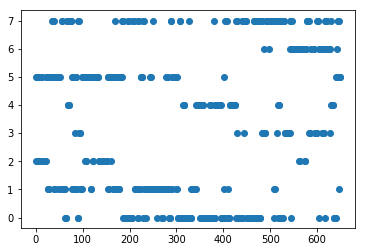

In [44]:
plt.scatter(np.arange(len(ClusterPred)), ClusterPred)
plt.show()

# That does not look like the original publication...